In [4]:
import random
random.seed(100)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,roc_auc_score, roc_curve, auc
from itertools import cycle
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay

In [6]:
df = pd.read_csv("musicData.csv")

In [7]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


#### Exploratory Data-Analysis and Pre-processing

In [8]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [9]:
df.shape

(50005, 18)

In [10]:
df.dtypes

instance_id         float64
artist_name          object
track_name           object
popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo                object
obtained_date        object
valence             float64
music_genre          object
dtype: object

In [11]:
data = df.copy()

In [12]:
# dropping redundant columns
data.drop(["instance_id", "artist_name","track_name", "obtained_date"], axis=1, inplace=True)

In [13]:
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [14]:
# checking for missing values
data.isna().sum()

popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
valence             5
music_genre         5
dtype: int64

In [15]:
df_null = data[data.isnull().any(axis=1)]
df_null
# entire row is filled with null values --> we drop them

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data.dropna(inplace=True)
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,music_genre
0,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,0.759,Electronic
1,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,0.531,Electronic
2,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,0.333,Electronic
3,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,0.270,Electronic
4,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,0.323,Electronic


In [17]:
# checking for hidden missing values

In [18]:
data.popularity.value_counts()

52.0    1316
54.0    1295
53.0    1286
50.0    1265
55.0    1250
        ... 
93.0       2
92.0       1
99.0       1
94.0       1
97.0       1
Name: popularity, Length: 99, dtype: int64

In [19]:
data.acousticness.value_counts()

0.995000    278
0.994000    240
0.992000    215
0.993000    198
0.991000    158
           ... 
0.000039      1
0.005080      1
0.000094      1
0.000055      1
0.000000      1
Name: acousticness, Length: 4193, dtype: int64

In [20]:
data.danceability.value_counts()

0.5290    143
0.6570    139
0.6100    134
0.5540    133
0.5470    130
         ... 
0.0868      1
0.0887      1
0.0646      1
0.0656      1
0.0663      1
Name: danceability, Length: 1088, dtype: int64

In [21]:
data.duration_ms.value_counts()

-1.0         4939
 240000.0      33
 192000.0      32
 180000.0      28
 216000.0      20
             ... 
 124627.0       1
 203998.0       1
 156572.0       1
 120280.0       1
 270027.0       1
Name: duration_ms, Length: 26028, dtype: int64

In [22]:
# uncovering hidden missing values
data['duration_ms'] = data['duration_ms'].replace(-1, pd.NA)

In [23]:
data['duration_ms'].isna().sum()

4939

In [24]:
# calculating mean values for duration_ms for each music genre
genre_to_duration = {}

for category in data['music_genre'].unique():
    subset = data[data['music_genre'] == category]
    
    mean_subset = subset['duration_ms'].mean()
    
    genre_to_duration[category] = mean_subset

In [25]:
genre_to_duration

{'Electronic': 270703.4312596856,
 'Anime': 230705.68102496135,
 'Jazz': 264371.0262047524,
 'Alternative': 233316.5956974939,
 'Country': 216899.0317213842,
 'Rap': 218927.02139037434,
 'Blues': 253820.2266991366,
 'Rock': 236833.3120409526,
 'Classical': 309661.8941857875,
 'Hip-Hop': 219951.26807095343}

In [26]:
# mean imputation for "duration_ms" depending on music genre
for genre, mean_duration in genre_to_duration.items():
    data.loc[data['music_genre'] == genre, 'duration_ms'] = data.loc[data['music_genre'] == genre, 'duration_ms'].fillna(float(mean_duration))

In [27]:
data.duration_ms = data.duration_ms.astype(float)

In [28]:
data.duration_ms.value_counts()

218927.021390    512
309661.894186    511
236833.312041    507
264371.026205    497
216899.031721    492
                ... 
270927.000000      1
132067.000000      1
124627.000000      1
203998.000000      1
270027.000000      1
Name: duration_ms, Length: 26037, dtype: int64

In [29]:
data.duration_ms.isna().sum()

0

In [30]:
data.energy.value_counts()

0.67500    103
0.80500    103
0.72000     99
0.85900     98
0.83000     96
          ... 
0.00881      1
0.00772      1
0.00812      1
0.00770      1
0.07250      1
Name: energy, Length: 2085, dtype: int64

In [31]:
data.instrumentalness.value_counts()

0.000000    15001
0.898000       70
0.902000       69
0.912000       66
0.897000       66
            ...  
0.000081        1
0.097900        1
0.005540        1
0.083800        1
0.000008        1
Name: instrumentalness, Length: 5131, dtype: int64

In [32]:
data.key.value_counts()

G     5727
C     5522
C#    5405
D     5265
A     4825
F     4341
B     3789
E     3760
A#    3356
G#    3319
F#    3101
D#    1590
Name: key, dtype: int64

In [33]:
# transforming the key variable into numerical data
# using domain knowledge to assign keys numbers
# order: C, C#, D, D#, E, F, F#, G, G#, A, A#, B
key_to_num = {'C': 1, 'C#': 2, 'D': 3, 'D#': 4, 'E': 5, 'F': 6, 'F#': 7, 'G': 8, 'G#': 9, 'A': 10, 'A#': 11, 'B': 12}
data['key'] = data['key'].replace(key_to_num)

data['key'].value_counts()

8     5727
1     5522
2     5405
3     5265
10    4825
6     4341
12    3789
5     3760
11    3356
9     3319
7     3101
4     1590
Name: key, dtype: int64

In [34]:
data.liveness.value_counts()

0.1100    625
0.1080    610
0.1110    609
0.1090    552
0.1070    542
         ... 
0.0300      1
0.0353      1
0.0246      1
0.0279      1
0.8230      1
Name: liveness, Length: 1646, dtype: int64

In [35]:
data.loudness.value_counts()

-5.443     19
-5.133     17
-7.066     17
-5.013     16
-5.587     16
           ..
-14.863     1
-25.928     1
-13.154     1
-22.622     1
 0.000      1
Name: loudness, Length: 17247, dtype: int64

In [36]:
data['mode'].value_counts()

Major    32099
Minor    17901
Name: mode, dtype: int64

In [37]:
# one hot encoding / binary encoding for the mode variable
data = pd.get_dummies(data, columns=['mode'])
data.drop(columns=["mode_Minor"], inplace=True) # drop one column --> redundant
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major
0,27.0,0.00468,0.652,270703.43126,0.941,0.79200,11,0.115,-5.201,0.0748,100.889,0.759,Electronic,0
1,31.0,0.01270,0.622,218293.00000,0.890,0.95000,3,0.124,-7.043,0.0300,115.00200000000001,0.531,Electronic,0
2,28.0,0.00306,0.620,215613.00000,0.755,0.01180,9,0.534,-4.617,0.0345,127.994,0.333,Electronic,1
3,34.0,0.02540,0.774,166875.00000,0.700,0.00253,2,0.157,-4.498,0.2390,128.014,0.270,Electronic,1
4,32.0,0.00465,0.638,222369.00000,0.587,0.90900,7,0.157,-6.266,0.0413,145.036,0.323,Electronic,1


In [38]:
data.speechiness.value_counts()

0.0332    173
0.0337    155
0.0315    153
0.0329    152
0.0362    148
         ... 
0.6150      1
0.5960      1
0.5910      1
0.6370      1
0.8200      1
Name: speechiness, Length: 1337, dtype: int64

In [39]:
data.tempo.value_counts() # there are null values in the form of "?"

?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
68.471                   1
81.446                   1
109.101                  1
140.371                  1
67.408                   1
Name: tempo, Length: 29394, dtype: int64

In [40]:
data.valence.value_counts()

0.3380    100
0.3240     95
0.3320     93
0.3510     91
0.3700     87
         ... 
0.0193      1
0.0468      1
0.0279      1
0.0266      1
0.0205      1
Name: valence, Length: 1615, dtype: int64

In [41]:
# looking at the music_genre variable
data.music_genre.value_counts()

Rap            5000
Jazz           5000
Classical      5000
Electronic     5000
Anime          5000
Country        5000
Rock           5000
Blues          5000
Hip-Hop        5000
Alternative    5000
Name: music_genre, dtype: int64

In [42]:
# transforming the music genre variable into numerical data
genre_to_num = {'Rap': 1, 'Electronic': 2, 'Hip-Hop': 3, 'Alternative': 4, 'Rock': 5, 'Blues': 6, 'Anime': 7, 'Country': 8, 'Jazz': 9, 'Classical': 10}
data['music_genre'] = data['music_genre'].replace(genre_to_num)

data['music_genre'].value_counts()

1     5000
2     5000
3     5000
4     5000
5     5000
6     5000
7     5000
8     5000
9     5000
10    5000
Name: music_genre, dtype: int64

In [43]:
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major
0,27.0,0.00468,0.652,270703.43126,0.941,0.79200,11,0.115,-5.201,0.0748,100.889,0.759,2,0
1,31.0,0.01270,0.622,218293.00000,0.890,0.95000,3,0.124,-7.043,0.0300,115.00200000000001,0.531,2,0
2,28.0,0.00306,0.620,215613.00000,0.755,0.01180,9,0.534,-4.617,0.0345,127.994,0.333,2,1
3,34.0,0.02540,0.774,166875.00000,0.700,0.00253,2,0.157,-4.498,0.2390,128.014,0.270,2,1
4,32.0,0.00465,0.638,222369.00000,0.587,0.90900,7,0.157,-6.266,0.0413,145.036,0.323,2,1


In [44]:
# discovering hidden missing values
data.tempo.value_counts()

?                     4980
140.007                 17
120.0                   17
100.00299999999999      16
100.014                 15
                      ... 
68.471                   1
81.446                   1
109.101                  1
140.371                  1
67.408                   1
Name: tempo, Length: 29394, dtype: int64

In [45]:
data['tempo'] = data['tempo'].apply(pd.to_numeric, errors='coerce')

In [46]:
data.tempo.value_counts()

120.000    17
140.007    17
100.003    16
130.016    15
100.002    15
           ..
174.976     1
109.416     1
111.031     1
104.067     1
105.925     1
Name: tempo, Length: 29393, dtype: int64

In [47]:
data.isna().sum()

popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
speechiness            0
tempo               4980
valence                0
music_genre            0
mode_Major             0
dtype: int64

In [48]:
data.dtypes

popularity          float64
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
music_genre           int64
mode_Major            uint8
dtype: object

In [49]:
data.isna().sum()

popularity             0
acousticness           0
danceability           0
duration_ms            0
energy                 0
instrumentalness       0
key                    0
liveness               0
loudness               0
speechiness            0
tempo               4980
valence                0
music_genre            0
mode_Major             0
dtype: int64

In [50]:
# imputing missing values for variable tempo
# KNN imputation to maintain structure and correlations in data
data_temp = data.values
ix = [i for i in range(data_temp.shape[1]) if i != 12]
X, y = data_temp[:, ix], data_temp[:, 12]
print('Missing: %d' % sum(np.isnan(X).flatten()))
imputer = KNNImputer(n_neighbors=10)
imputer.fit(X)
Xtrans = imputer.transform(X)
print('Missing: %d' % sum(np.isnan(Xtrans).flatten()))

Missing: 4980
Missing: 0


In [51]:
data_trans = pd.DataFrame(Xtrans)
data_trans.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,27.0,0.00468,0.652,270703.43126,0.941,0.79200,11.0,0.115,-5.201,0.0748,100.889,0.759,0.0
1,31.0,0.01270,0.622,218293.00000,0.890,0.95000,3.0,0.124,-7.043,0.0300,115.002,0.531,0.0
2,28.0,0.00306,0.620,215613.00000,0.755,0.01180,9.0,0.534,-4.617,0.0345,127.994,0.333,1.0
3,34.0,0.02540,0.774,166875.00000,0.700,0.00253,2.0,0.157,-4.498,0.2390,128.014,0.270,1.0
4,32.0,0.00465,0.638,222369.00000,0.587,0.90900,7.0,0.157,-6.266,0.0413,145.036,0.323,1.0


In [52]:
data.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,music_genre,mode_Major
0,27.0,0.00468,0.652,270703.43126,0.941,0.79200,11,0.115,-5.201,0.0748,100.889,0.759,2,0
1,31.0,0.01270,0.622,218293.00000,0.890,0.95000,3,0.124,-7.043,0.0300,115.002,0.531,2,0
2,28.0,0.00306,0.620,215613.00000,0.755,0.01180,9,0.534,-4.617,0.0345,127.994,0.333,2,1
3,34.0,0.02540,0.774,166875.00000,0.700,0.00253,2,0.157,-4.498,0.2390,128.014,0.270,2,1
4,32.0,0.00465,0.638,222369.00000,0.587,0.90900,7,0.157,-6.266,0.0413,145.036,0.323,2,1


In [53]:
# restructuring the dataframe
col_names = data.columns.drop(labels=['music_genre'])
data_trans.columns = col_names
data_trans['music_genre'] = y

In [54]:
data_trans.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,mode_Major,music_genre
0,27.0,0.00468,0.652,270703.43126,0.941,0.79200,11.0,0.115,-5.201,0.0748,100.889,0.759,0.0,2.0
1,31.0,0.01270,0.622,218293.00000,0.890,0.95000,3.0,0.124,-7.043,0.0300,115.002,0.531,0.0,2.0
2,28.0,0.00306,0.620,215613.00000,0.755,0.01180,9.0,0.534,-4.617,0.0345,127.994,0.333,1.0,2.0
3,34.0,0.02540,0.774,166875.00000,0.700,0.00253,2.0,0.157,-4.498,0.2390,128.014,0.270,1.0,2.0
4,32.0,0.00465,0.638,222369.00000,0.587,0.90900,7.0,0.157,-6.266,0.0413,145.036,0.323,1.0,2.0


#### Data Visualization

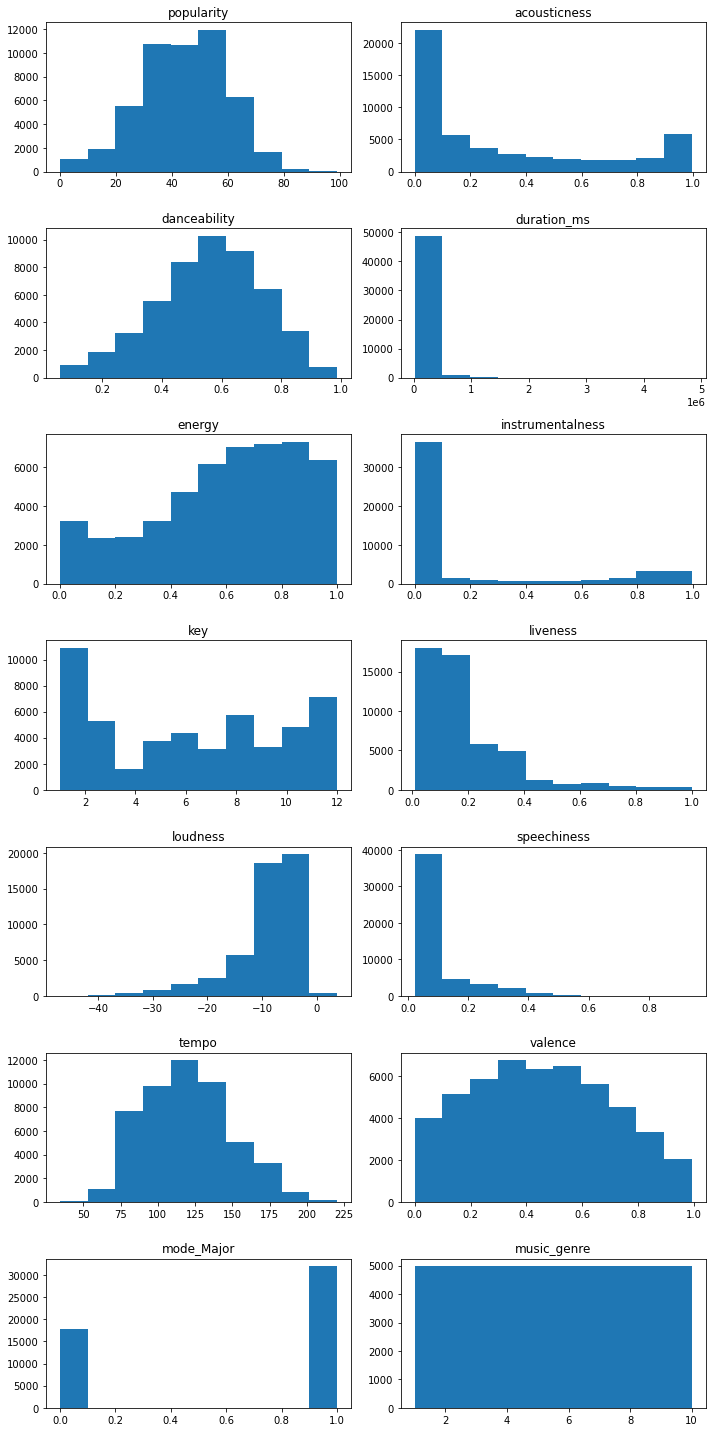

In [55]:
# plotting all variables as histograms
num_cols = len(data_trans.columns)
rows = int(num_cols / 2) + (num_cols % 2)
cols = 2

fig, axs = plt.subplots(rows, cols, figsize=(10, 20))
axs = axs.ravel()

# Loop through each column of the DataFrame and plot it as a subplot
for i, col in enumerate(data_trans.columns):
    axs[i].hist(data_trans[col])
    axs[i].set_title(col)

# Show the plot
plt.tight_layout()
plt.show()

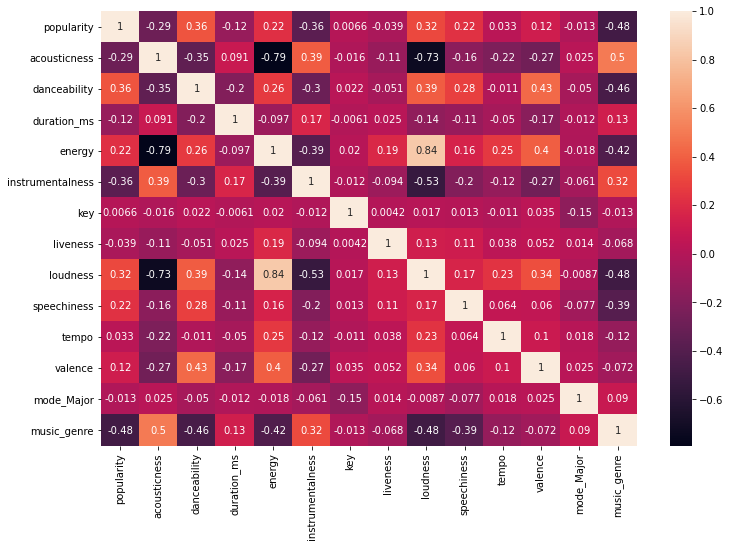

In [56]:
# heatmap for variables in the dataset to see correlations
plt.figure(figsize=(12,8))
g=sns.heatmap(data_trans.corr(), annot=True)

#### Scaling data

In [57]:
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [58]:
data_trans.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'mode_Major', 'music_genre'],
      dtype='object')

In [59]:
# not scaling categorical data - key, mode, tempo music_genre
cols_to_norm = data_trans.columns.drop(labels=['key','mode_Major','music_genre'])
cols_to_norm

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'valence'],
      dtype='object')

In [60]:
data_scaled = data_trans.copy()

In [61]:
# using a min max scaler
scaler = MinMaxScaler()

In [62]:
data_scaled[cols_to_norm] = scaler.fit_transform(data_trans[cols_to_norm])

In [63]:
data_scaled

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,mode_Major,music_genre
0,0.272727,0.004699,0.639465,0.052999,0.941896,0.795181,11.0,0.106358,0.823883,0.057084,0.357889,0.765121,0.0,2.0
1,0.313131,0.012751,0.607081,0.042114,0.890804,0.953815,3.0,0.115446,0.787616,0.008372,0.433795,0.535282,0.0,2.0
2,0.282828,0.003072,0.604922,0.041558,0.755562,0.011847,9.0,0.529450,0.835381,0.013265,0.503671,0.335685,1.0,2.0
3,0.343434,0.025502,0.771157,0.031436,0.700463,0.002540,2.0,0.148769,0.837724,0.235620,0.503778,0.272177,1.0,2.0
4,0.323232,0.004669,0.624352,0.042961,0.587260,0.912651,7.0,0.148769,0.802914,0.020659,0.595329,0.325605,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.595960,0.033534,0.921200,0.042459,0.574237,0.000000,2.0,0.110398,0.788029,0.299772,0.342502,0.332661,1.0,3.0
49996,0.727273,0.157631,0.700993,0.049085,0.361856,0.000000,12.0,0.100300,0.733058,0.035555,0.471664,0.113911,1.0,3.0
49997,0.515152,0.005994,0.683722,0.036131,0.763576,0.000000,3.0,0.134632,0.819118,0.134500,0.520263,0.398185,1.0,3.0
49998,0.656566,0.083434,0.779793,0.051352,0.472054,0.000000,8.0,0.097271,0.827525,0.023703,0.223413,0.356855,0.0,3.0


#### Train and test split

In [64]:
data_scaled

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,mode_Major,music_genre
0,0.272727,0.004699,0.639465,0.052999,0.941896,0.795181,11.0,0.106358,0.823883,0.057084,0.357889,0.765121,0.0,2.0
1,0.313131,0.012751,0.607081,0.042114,0.890804,0.953815,3.0,0.115446,0.787616,0.008372,0.433795,0.535282,0.0,2.0
2,0.282828,0.003072,0.604922,0.041558,0.755562,0.011847,9.0,0.529450,0.835381,0.013265,0.503671,0.335685,1.0,2.0
3,0.343434,0.025502,0.771157,0.031436,0.700463,0.002540,2.0,0.148769,0.837724,0.235620,0.503778,0.272177,1.0,2.0
4,0.323232,0.004669,0.624352,0.042961,0.587260,0.912651,7.0,0.148769,0.802914,0.020659,0.595329,0.325605,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.595960,0.033534,0.921200,0.042459,0.574237,0.000000,2.0,0.110398,0.788029,0.299772,0.342502,0.332661,1.0,3.0
49996,0.727273,0.157631,0.700993,0.049085,0.361856,0.000000,12.0,0.100300,0.733058,0.035555,0.471664,0.113911,1.0,3.0
49997,0.515152,0.005994,0.683722,0.036131,0.763576,0.000000,3.0,0.134632,0.819118,0.134500,0.520263,0.398185,1.0,3.0
49998,0.656566,0.083434,0.779793,0.051352,0.472054,0.000000,8.0,0.097271,0.827525,0.023703,0.223413,0.356855,0.0,3.0


In [65]:
data_scaled.music_genre.value_counts()

4.0     5000
8.0     5000
7.0     5000
2.0     5000
5.0     5000
9.0     5000
3.0     5000
6.0     5000
10.0    5000
1.0     5000
Name: music_genre, dtype: int64

In [66]:
# splitting data; ensure class balance
# 10% testing, 90% training
trainData = pd.DataFrame()
testData = pd.DataFrame()

for category in data_scaled['music_genre'].unique():
    subset = data_scaled[data_scaled['music_genre'] == category]
    
    train, test = train_test_split(subset, test_size=0.1, random_state=42)
    
    trainData = trainData.append(train, ignore_index=True)
    testData = testData.append(test, ignore_index=True)
    

In [67]:
trainData

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,mode_Major,music_genre
0,0.303030,0.031526,0.394430,0.064317,0.752557,0.266064,6.0,0.139681,0.732526,0.017288,0.453160,0.420363,1.0,2.0
1,0.272727,0.000949,0.743092,0.048135,0.965939,0.000634,2.0,0.300233,0.930282,0.219311,0.568287,0.375000,1.0,2.0
2,0.444444,0.153614,0.790587,0.051842,0.549192,0.380522,6.0,0.336585,0.732250,0.025334,0.460746,0.479839,1.0,2.0
3,0.323232,0.320281,0.835924,0.036348,0.497099,0.034839,12.0,0.126554,0.772495,0.018810,0.428405,0.375000,0.0,2.0
4,0.444444,0.783133,0.530440,0.054916,0.327795,0.931727,11.0,0.102319,0.603702,0.013265,0.632801,0.039919,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.505051,0.101406,0.870466,0.037012,0.647368,0.000000,7.0,0.101310,0.806064,0.334566,0.568260,0.438508,0.0,3.0
44996,0.575758,0.071285,0.772237,0.042459,0.679426,0.000000,6.0,0.100300,0.800748,0.157334,0.229367,0.497984,0.0,3.0
44997,0.515152,0.135542,0.682642,0.053409,0.668406,0.000000,2.0,0.153817,0.702678,0.381320,0.468315,0.200605,1.0,3.0
44998,0.555556,0.130522,0.798143,0.032092,0.445005,0.000018,3.0,0.659709,0.755779,0.606393,0.674865,0.601815,1.0,3.0


In [68]:
trainData['music_genre'].value_counts()

4.0     4500
8.0     4500
7.0     4500
2.0     4500
5.0     4500
9.0     4500
3.0     4500
6.0     4500
10.0    4500
1.0     4500
Name: music_genre, dtype: int64

In [69]:
testData

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,mode_Major,music_genre
0,0.313131,0.013454,0.272453,0.063569,0.981968,0.062149,6.0,0.282057,0.871392,0.388931,0.619876,0.043347,0.0,2.0
1,0.515152,0.092771,0.504534,0.049416,0.513128,0.167671,1.0,0.320429,0.710337,0.008916,0.401169,0.295363,1.0,2.0
2,0.282828,0.000151,0.434370,0.061797,0.736528,0.455823,5.0,0.141700,0.808013,0.010329,0.514696,0.098085,1.0,2.0
3,0.494949,0.055120,0.528282,0.031124,0.702467,0.468876,2.0,0.333555,0.831601,0.311732,0.676070,0.450605,1.0,2.0
4,0.434343,0.312249,0.806779,0.036792,0.905831,0.086647,7.0,0.073339,0.818901,0.053061,0.315475,0.642137,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.676768,0.000810,0.849957,0.035561,0.661393,0.001265,9.0,0.095251,0.835440,0.035338,0.589644,0.185484,1.0,3.0
4996,0.525253,0.800201,0.507772,0.073919,0.626330,0.000002,8.0,0.212384,0.776984,0.303034,0.337161,0.451613,0.0,3.0
4997,0.616162,0.465863,0.618955,0.012521,0.511124,0.000000,1.0,0.063645,0.766804,0.063825,0.240167,0.392137,0.0,3.0
4998,0.484848,0.547189,0.502375,0.008484,0.794632,0.000000,11.0,0.812184,0.752373,0.328042,0.375547,0.540323,1.0,3.0


In [70]:
testData['music_genre'].value_counts()

6.0     500
5.0     500
1.0     500
4.0     500
9.0     500
2.0     500
10.0    500
3.0     500
8.0     500
7.0     500
Name: music_genre, dtype: int64

In [71]:
# splitting train and test into X (independent variables) and y (labels)
y_train = trainData['music_genre']
X_train = trainData.drop(columns=['music_genre'])

y_test = testData['music_genre']
X_test = testData.drop(columns=['music_genre'])

### Dimension Reduction Methods

#### LDA

In [72]:
# using LDA for dimension reduction because it creates partial separtion of classes (better than other methods) 
# and outcomes are labeled

In [73]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

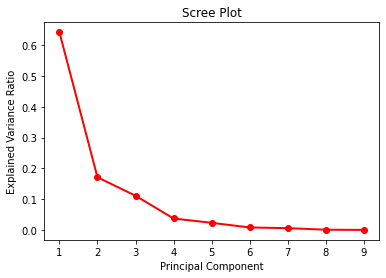

In [74]:
# visualize how much variance each component explains
plt.plot(range(1, lda.explained_variance_ratio_.size + 1), lda.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [75]:
lda.explained_variance_ratio_

array([6.42715224e-01, 1.71115719e-01, 1.11265967e-01, 3.71782980e-02,
       2.31668550e-02, 7.99669656e-03, 5.77399017e-03, 7.26686177e-04,
       6.05645398e-05])

In [78]:
# calculating how much variance having n components explains
# want dimensionally reduced data to explain at least 90% of the variance in original data
totalExplained = 0

for comp, ratio in enumerate(lda.explained_variance_ratio_):
    totalExplained += ratio
    print(comp+1, "components explains", totalExplained*100, "of the variance")

1 components explains 64.27152237202984 of the variance
2 components explains 81.38309428049465 of the variance
3 components explains 92.50969095533563 of the variance
4 components explains 96.22752075226506 of the variance
5 components explains 98.5442062559439 of the variance
6 components explains 99.34387591152006 of the variance
7 components explains 99.92127492836386 of the variance
8 components explains 99.99394354602192 of the variance
9 components explains 99.99999999999999 of the variance


In [79]:
y_train.unique()

array([ 2.,  7.,  9.,  4.,  8.,  1.,  6.,  5., 10.,  3.])

In [80]:
genre_to_num

{'Rap': 1,
 'Electronic': 2,
 'Hip-Hop': 3,
 'Alternative': 4,
 'Rock': 5,
 'Blues': 6,
 'Anime': 7,
 'Country': 8,
 'Jazz': 9,
 'Classical': 10}

In [81]:
# performing LDA with 3 components
lda = LinearDiscriminantAnalysis(n_components=3)

In [82]:
# fitting on training data
# transforming both training and testing data
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

In [83]:
list(y_train.unique())

[2.0, 7.0, 9.0, 4.0, 8.0, 1.0, 6.0, 5.0, 10.0, 3.0]

In [84]:
genre_to_num

{'Rap': 1,
 'Electronic': 2,
 'Hip-Hop': 3,
 'Alternative': 4,
 'Rock': 5,
 'Blues': 6,
 'Anime': 7,
 'Country': 8,
 'Jazz': 9,
 'Classical': 10}

In [85]:
# printing music genres as names for graph, rather than numbers
genre_order = [k for k, v in sorted(genre_to_num.items(), key=lambda item: list(y_train.unique()).index(item[1]))]
genre_order

['Electronic',
 'Anime',
 'Jazz',
 'Alternative',
 'Country',
 'Rap',
 'Blues',
 'Rock',
 'Classical',
 'Hip-Hop']

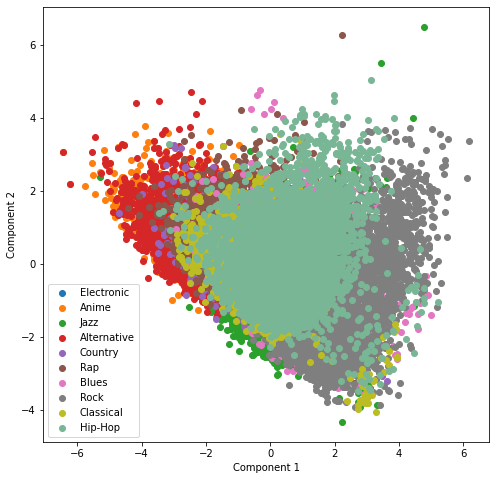

In [86]:
# visualization of first 2 components
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#79B696']

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#79B696']

plt.figure(figsize=(8, 8))
for i, c, label in zip(range(10), colors, genre_order):
    plt.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], c=c, label=label)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

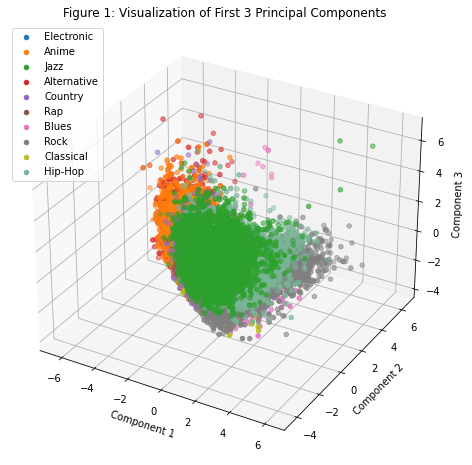

In [87]:
# visualization of first three components
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22','#79B696']

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
for i, c, label in zip(range(10), colors, genre_order):
    ax.scatter(X_train[y_train==i, 0], X_train[y_train==i, 1], X_train[y_train==i, 2], c=c, label=label)
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.title("Figure 1: Visualization of First 3 Principal Components")
plt.show()


In [88]:
coef = lda.coef_[0]

In [89]:
# looking for features with highest importance
for i, c in enumerate(coef):
    print("Feature %d: %.4f" % (i+1, c))

Feature 1: 17.6345
Feature 2: -1.7965
Feature 3: 6.8051
Feature 4: -7.9058
Feature 5: -2.4910
Feature 6: -1.2473
Feature 7: -0.0057
Feature 8: 0.7776
Feature 9: 5.2076
Feature 10: 11.9094
Feature 11: 0.2470
Feature 12: -2.6436
Feature 13: -0.3222


In [90]:
trainData.columns

Index(['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'mode_Major', 'music_genre'],
      dtype='object')

In [91]:
print("Most important feature:", trainData.columns[0])
print("Second most important feature:", trainData.columns[9])
print("Third most important feature:", trainData.columns[3])

Most important feature: popularity
Second most important feature: speechiness
Third most important feature: duration_ms


### Classification

In [92]:
# testing numerous classification methods to find the best

#### Logistic Regression

In [93]:
logreg = LogisticRegression(multi_class='multinomial')

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict labels and probabilities for the test set
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class = 'ovr')

In [94]:
print("AUC score:", auc_score)


AUC score: 0.8859978222222222


#### KNN

In [95]:
knn = KNeighborsClassifier(n_neighbors=10)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict labels and probabilities for the test set
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)

# Compute AUC score
auc_score = roc_auc_score(y_test, y_prob, multi_class = 'ovr')

In [96]:
print("AUC score:", auc_score)

AUC score: 0.8495230444444445


#### Decision Tree

In [97]:
clf = DecisionTreeClassifier()

clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [98]:
print("AUC score:", auc_score)

AUC score: 0.6531947111111112


#### Random Forest

In [99]:
rf = RandomForestClassifier(n_estimators = 200, class_weight='balanced')

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)

auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

In [100]:
print("AUC score:", auc_score)

AUC score: 0.8722453111111111


#### Gradient Boosting

In [101]:
gb = GradientBoostingClassifier(learning_rate=0.08) # hypertune learning rate parameter

# Train the classifier on the training data
gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_proba = gb.predict_proba(X_test)
y_pred = gb.predict(X_test)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("AUC score:", auc_score)

AUC score: 0.8955732444444445


#### SVM

In [102]:
# Train the SVM classifier
svm = SVC(kernel='linear', probability=True)

svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_score = svm.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')

In [103]:
print("AUC score:", roc_auc)


AUC score: 0.8885858666666667


#### adaBoost

In [104]:
ada = AdaBoostClassifier(n_estimators=13)

# Fit the model with the training data
ada.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = ada.predict(X_test)
y_proba = ada.predict_proba(X_test)

roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr')

In [105]:
print("AUC score:", roc_auc)

AUC score: 0.8167564444444444


#### Final Model + AUC Scores + ROC Curve Display

In [ ]:
# Best model outcome: Gradient Boosting
gb = GradientBoostingClassifier(learning_rate=0.08)

# Train the classifier on the training data
gb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_proba = gb.predict_proba(X_test)
y_pred = gb.predict(X_test)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print("AUC score:", auc_score)
print("Accuracy:", accuracy)

In [ ]:
label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape 

In [ ]:
fpr, tpr, roc_auc = dict(), dict(), dict()
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_proba.ravel())

In [ ]:
#fpr, tpr, and roc_auc for all averaging strategies
fpr, tpr, roc_auc = dict(), dict(), dict()

In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_onehot_test.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

print(f"Micro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['micro']:.2f}")

In [ ]:
n_classes = len(np.unique(y))

In [ ]:
## Macro average AUC Score
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_onehot_test[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

fpr_grid = np.linspace(0.0, 1.0, 1000)

# Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(fpr_grid)

for i in range(n_classes):
    mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation

# Average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = fpr_grid
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

print(f"Macro-averaged One-vs-Rest ROC AUC score:\n{roc_auc['macro']:.2f}")


In [ ]:
# plotting the AUC ROC curve for all classes and the macro avg
fig, ax = plt.subplots(figsize=(7, 7))

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label=f"macro-average ROC curve (AUC = {roc_auc['macro']:.2f})",
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(sns.color_palette())
for class_id, color in zip(range(n_classes), colors):
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, class_id],
        y_pred_proba[:, class_id],
        #name=f"ROC curve for {target_names[class_id]}",
        name=f"ROC curve for {list(genre_to_num.keys())[class_id]}",
        color=color,
        ax=ax,
    )

plt.plot([0, 1], [0, 1], "k--", label="ROC curve for chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Figure 2: AUC ROC Curve\nOne-vs-Rest multiclass")
plt.legend()
plt.show()
